In [2]:
%load_ext autoreload
# %reload_ext autoreload

In [3]:
import os
import pandas as pd
from pycaret.time_series import TSForecastingExperiment
import numpy as np
import matplotlib.pylab as plt
from pycaret.regression import *
from pathlib import Path

In [4]:
%autoreload
import sys
sys.path.append(sys.path[0][0:-4] + 'mikael')
from pipeline import Pipin
pipin = Pipin()

In [5]:
df_0 = pipin.get_combined_datasets(randomize=True)

In [6]:
df_0.columns

Index(['time', 'effective_cloud_cover:p', 'visibility:m', 'fresh_snow_1h:cm',
       'wind_speed_w_1000hPa:ms', 'fresh_snow_3h:cm', 'fresh_snow_6h:cm',
       'air_density_2m:kgm3', 'msl_pressure:hPa', 'cloud_base_agl:m',
       'ceiling_height_agl:m', 'pressure_100m:hPa', 'pressure_50m:hPa',
       'wind_speed_v_10m:ms', 't_1000hPa:K', 'absolute_humidity_2m:gm3',
       'clear_sky_energy_1h:J', 'diffuse_rad:W', 'snow_melt_10min:mm',
       'wind_speed_10m:ms', 'sfc_pressure:hPa', 'prob_rime:p',
       'total_cloud_cover:p', 'elevation:m', 'fresh_snow_24h:cm',
       'fresh_snow_12h:cm', 'sun_azimuth:d', 'direct_rad:W', 'dew_point_2m:K',
       'date_calc', 'diffuse_rad_1h:J', 'snow_depth:cm',
       'relative_humidity_1000hPa:p', 'wind_speed_u_10m:ms',
       'snow_density:kgm3', 'clear_sky_rad:W', 'precip_5min:mm',
       'snow_water:kgm2', 'super_cooled_liquid_water:kgm2', 'sun_elevation:d',
       'rain_water:kgm2', 'direct_rad_1h:J', 'dew_or_rime:idx', 'is_day:idx',
       'is_in_

In [7]:
# can you move the pv_measurment to the end of the df?
df = df_0.copy()
pv_measurement = df['elevation:m']
df = df.drop(columns=['elevation:m']) 
# add the column to the end of the df
df['elevation:m'] = pv_measurement

# # I want to change the values of location from string to int
# mask_a = df['location:idx'] == 'A'
# mask_b = df['location:idx'] == 'B'
# mask_c = df['location:idx'] == 'C'
# df['location:idx'][mask_a] = 0
# df['location:idx'][mask_b] = 1
# df['location:idx'][mask_c] = 2
# df

# mask_0 = df['location:idx'] == 0
# df['location:idx'][mask_0] = 3
df.head(15)

,time,effective_cloud_cover:p,visibility:m,fresh_snow_1h:cm,wind_speed_w_1000hPa:ms,fresh_snow_3h:cm,fresh_snow_6h:cm,air_density_2m:kgm3,msl_pressure:hPa,cloud_base_agl:m,...,is_day:idx,is_in_shadow:idx,precip_type_5min:idx,snow_drift:idx,day_of_year,hour,month,pv_measurement,location:idx,elevation:m
0,2020-04-01 00:00:00,96.500000,18919.449219,0.0,0.0,0.0,0.0,1.27025,1009.199951,470.024994,...,0.0,1.0,0.0,0.0,92,0,4,0.000000,B,7.0
1,2019-02-02 11:00:00,100.000000,58328.500000,0.0,0.0,0.0,0.0,1.31000,1011.150024,1891.699951,...,1.0,0.0,0.0,0.0,33,11,2,25.012500,B,7.0
2,2019-09-20 10:00:00,100.000000,1716.650024,0.0,0.0,0.0,0.0,1.22925,1013.625000,622.849976,...,1.0,0.0,0.0,0.0,263,10,9,117.600000,C,24.0
3,2019-11-13 07:00:00,70.349998,53396.375000,0.0,0.0,0.0,0.0,1.26400,996.224976,1304.150024,...,0.0,1.0,0.0,0.0,317,7,11,0.000000,C,24.0
4,2021-03-17 21:00:00,99.724998,26132.349609,0.0,0.0,0.0,0.0,1.28925,1025.149902,231.649994,...,0.0,1.0,0.0,0.0,76,21,3,0.000000,C,24.0
5,2022-11-09 06:00:00,99.925003,25216.224609,0.0,0.0,0.0,0.0,1.23500,992.849976,1238.550049,...,0.0,1.0,0.0,0.0,313,6,11,-0.000000,B,7.0
6,2020-04-21 04:00:00,0.450000,34227.898438,0.0,0.0,0.0,0.0,1.30575,1035.199951,NaN,...,1.0,0.0,0.0,0.0,112,4,4,29.400000,C,24.0
7,2022-03-09 07:00:00,0.925000,63350.625000,0.0,0.0,0.0,0.0,1.29525,1019.099976,NaN,...,1.0,0.0,0.0,0.0,68,7,3,120.750000,B,7.0
8,2020-04-27 00:00:00,9.775000,26904.675781,0.0,0.0,0.0,0.0,1.28100,1010.650024,1148.449951,...,0.0,1.0,0.0,0.0,118,0,4,0.000000,C,24.0
9,2019-07-04 18:00:00,65.875000,36730.648438,0.0,0.0,0.0,0.0,1.23250,1008.650024,1133.150024,...,1.0,0.0,0.0,0.0,185,18,7,102.637500,B,7.0


In [32]:
to_ignore = []
keepers = [
"pv_measurement",
"location:idx",
"direct_rad:W",
"direct_rad_1h:J",
"clear_sky_rad:W",
"clear_sky_energy_1h:J",
"sun_elevation:d",
"diffuse_rad:W",
"sun_azimuth:d",
"diffuse_rad_1h:J",
"effective_cloud_cover:p",
"visibility:m",
"hour",
"is_in_shadow:idx",
"wind_speed_u_10m:ms",


# "time",
# "day_of_year",
# "air_density_2m:kgm3",
# "direct_rad_1h:J",
# "date_calc",
# "ceiling_height_agl:m",
# "msl_pressure:hPa",
# "pressure_100m:hPa",
# "sfc_pressure:hPa",
# "pressure_50m:hPa",
# "relative_humidity_1000hPa:p",
# "cloud_base_agl:m",
# "dew_point_2m:K",
# "absolute_humidity_2m:gm3",
# "precip_5min:mm",
# "prob_rime:p",
# "t_1000hPa:K",
# "total_cloud_cover:p",
# "elevation:m",
# "dew_or_rime:idx",
# "is_day:idx",
# "is_in_shadow:idx",
# "month",
# "year",
]


# add rest of name from df columns
for col in df.columns:
    if col not in keepers:
        to_ignore.append(col)
# to_ignore
# keepers

In [20]:
ignore_features = pipin.get_irrelevant_features() #+ to_ignore
categorical_features = pipin.get_categorical_features(df)

should_ignore = False
if should_ignore:
    ignore_features = to_ignore + ignore_features
    categorical_features = list( set(categorical_features) - set(to_ignore) )
print(ignore_features)
print(categorical_features)

['date_calc', 'time', 'consecutive_count']
['dew_or_rime:idx', 'is_day:idx', 'is_in_shadow:idx', 'precip_type_5min:idx', 'snow_drift:idx', 'location:idx']


In [33]:
# I need to normalize the data before numerical data by itself. If not categorical data will be normalized. I think this is a bug.

numerical_feature = list(set(df.columns) - set(categorical_features) ) #- set(ignore_features)
numeric_dataSet = df[numerical_feature]
categorical_dataset = df[categorical_features + ["pv_measurement"]]

num = setup(data = numeric_dataSet, target = 'pv_measurement', normalize=True)

,Description,Value
0,Session id,193
1,Target,pv_measurement
2,Target type,Regression
3,Original data shape,"(93023, 46)"
4,Transformed data shape,"(93023, 47)"
5,Transformed train set shape,"(65116, 47)"
6,Transformed test set shape,"(27907, 47)"
7,Numeric features,43
8,Date features,2
9,Rows with missing values,99.4%


In [35]:
normalizedData =pd.DataFrame(num.dataset_transformed)
# sort the rows by index 
normalizedData = normalizedData.sort_index()
categorical_dataset_for_merge = categorical_dataset.drop(columns=["pv_measurement"])
df_transformed = pd.merge(categorical_dataset_for_merge, normalizedData, left_index=True, right_index=True)
normalizedData.shape


(93023, 47)

In [39]:
categorical_features
df_transformed

,dew_or_rime:idx,is_day:idx,is_in_shadow:idx,precip_type_5min:idx,snow_drift:idx,location:idx,effective_cloud_coverp,visibilitym,fresh_snow_1hcm,wind_speed_w_1000hPams,...,snow_densitykgm3,clear_sky_radW,precip_5minmm,snow_waterkgm2,day_of_year,super_cooled_liquid_waterkgm2,sun_elevationd,pressure_50mhPa,direct_rad_1hJ,pv_measurement
0,0.0,0.0,1.0,0.0,0.0,B,0.858092,-0.786287,-0.096144,0.001914,...,0.0,-0.627250,-0.193869,-0.380343,-0.764096,0.408952,-0.822643,0.013246,-0.450864,0.000000
1,0.0,1.0,0.0,0.0,0.0,B,0.960266,1.416044,-0.096144,0.001914,...,0.0,-0.132617,-0.193869,0.040302,-1.302711,0.408952,0.448045,0.137782,-0.414047,25.012501
2,0.0,1.0,0.0,0.0,0.0,C,0.960266,-1.747647,-0.096144,0.001914,...,0.0,1.358300,-0.193869,-0.380343,0.796973,0.408952,1.184149,0.189512,-0.450353,117.599998
3,0.0,0.0,1.0,0.0,0.0,C,0.094701,1.140418,-0.096144,0.001914,...,0.0,-0.625824,-0.193869,-0.380343,1.289943,-0.536700,-0.023007,-1.151650,-0.450864,0.000000
4,0.0,0.0,1.0,0.0,0.0,C,0.952238,-0.383202,-0.096144,0.001914,...,0.0,-0.627250,-0.193869,0.040302,-0.910161,1.827430,-0.942120,1.036359,-0.450864,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93018,0.0,0.0,1.0,0.0,0.0,A,0.879256,0.480562,-0.096144,0.001914,...,0.0,-0.627250,-0.193869,-0.380343,0.641779,0.881778,-0.432311,0.210585,-0.450864,0.000000
93019,0.0,0.0,1.0,0.0,0.0,C,0.960266,-1.369416,-0.096144,0.001914,...,0.0,-0.627250,-0.193869,0.040302,1.408621,0.645365,-0.534726,-0.209006,-0.450864,0.000000
93020,0.0,0.0,1.0,0.0,0.0,C,0.679286,1.127263,-0.096144,0.001914,...,0.0,-0.627250,-0.193869,0.145463,-1.247937,-0.536700,-0.210639,-0.927485,-0.450864,0.000000
93021,0.0,0.0,1.0,0.0,0.0,A,0.946400,1.472907,-0.096144,0.001914,...,0.0,-0.627250,-0.193869,0.145463,1.728138,-0.536700,-1.088824,-2.870252,-0.450864,0.000000


In [58]:
# s = setup(df_transformed, target="pv_measurement", normalize=False, categorical_features=categorical_features, experiment_name="pv_power_mw", ignore_features=ignore_features, index=False)
s = setup(df_transformed, target="pv_measurement", normalize=False, categorical_features=categorical_features, experiment_name="pv_power_mw", ignore_features=ignore_features, index=False)
# s = setup(df_transformed, target="pv_measurement", normalize=False, categorical_features=categorical_features, experiment_name="pv_power_mw", ignore_features=ignore_features, index=False, imputation_type="iterative", feature_selection="classic", feature_selection_estimator="et", remove_multicollinearity=True, remove_outliers = True, low_variance_threshold = 0.1,)
# s = setup(df_transformed, target="pv_measurement", imputation_type="iterative", feature_selection="classic", feature_selection_estimator="et", remove_multicollinearity=True, remove_outliers = True, low_variance_threshold = 0.1,  normalize=False, categorical_features=categorical_features, experiment_name="pv_power_mw", ignore_features=ignore_features, index=False,)

,Description,Value
0,Session id,4620
1,Target,pv_measurement
2,Target type,Regression
3,Original data shape,"(93023, 53)"
4,Transformed data shape,"(93023, 61)"
5,Transformed train set shape,"(65116, 61)"
6,Transformed test set shape,"(27907, 61)"
7,Ignore features,3
8,Ordinal features,3
9,Numeric features,46


In [59]:
preprocessed_data = s.dataset_transformed
preprocessed_data
print(preprocessed_data.shape)
print (preprocessed_data.columns)
preprocessed_data.head(20)
# preprocessed_data.describe()
# categorical features are normalized. That is not good.

(93023, 61)
Index(['dew_or_rimeidx_0.0', 'dew_or_rimeidx_-1.0', 'dew_or_rimeidx_1.0',
       'is_dayidx', 'is_in_shadowidx', 'precip_type_5minidx_0.0',
       'precip_type_5minidx_3.0', 'precip_type_5minidx_1.0',
       'precip_type_5minidx_2.0', 'precip_type_5minidx_5.0', 'snow_driftidx',
       'locationidx_B', 'locationidx_A', 'locationidx_C',
       'effective_cloud_coverp', 'visibilitym', 'fresh_snow_1hcm',
       'wind_speed_w_1000hPams', 'fresh_snow_3hcm', 'fresh_snow_6hcm',
       'air_density_2mkgm3', 'msl_pressurehPa', 'rain_waterkgm2',
       'cloud_base_aglm', 'time_year', 'time_month', 'time_day',
       'ceiling_height_aglm', 'pressure_100mhPa', 'wind_speed_v_10mms',
       't_1000hPaK', 'absolute_humidity_2mgm3', 'clear_sky_energy_1hJ',
       'diffuse_radW', 'snow_melt_10minmm', 'hour', 'wind_speed_10mms',
       'sfc_pressurehPa', 'prob_rimep', 'total_cloud_coverp', 'elevationm',
       'fresh_snow_24hcm', 'fresh_snow_12hcm', 'sun_azimuthd', 'month',
       'direct_rad

,dew_or_rimeidx_0.0,dew_or_rimeidx_-1.0,dew_or_rimeidx_1.0,is_dayidx,is_in_shadowidx,precip_type_5minidx_0.0,precip_type_5minidx_3.0,precip_type_5minidx_1.0,precip_type_5minidx_2.0,precip_type_5minidx_5.0,...,snow_densitykgm3,clear_sky_radW,precip_5minmm,snow_waterkgm2,day_of_year,super_cooled_liquid_waterkgm2,sun_elevationd,pressure_50mhPa,direct_rad_1hJ,pv_measurement
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.109654,-0.193869,0.145463,1.153007,-0.536700,0.577310,-0.726311,-0.421945,41.400002
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,-0.627250,-0.193869,0.040302,1.627718,0.645365,-1.991491,1.189635,-0.450864,0.000000
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,-0.627250,-0.193869,-0.380343,-1.567454,-0.536700,-2.002218,1.929191,-0.450864,0.000000
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,-0.627250,-0.193869,-0.380343,-1.174904,-0.536700,-0.088605,-0.103629,-0.417401,0.000000
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,-0.627250,-0.193869,-0.380343,-1.576583,-0.536700,-1.346812,1.860216,-0.450864,0.000000
5,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,-0.627250,-0.193869,0.250624,0.760457,-0.536700,-0.812573,0.664667,-0.450864,0.000000
6,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,-0.627250,-0.193869,-0.380343,0.888264,-0.536700,-0.393543,0.312131,-0.450864,0.000000
7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2.709382,-0.193869,-0.380343,0.048390,-0.536700,1.932015,0.856262,4.824579,4575.779785
8,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,-0.627250,-0.193869,-0.380343,0.587005,-0.536700,-0.612826,1.473196,-0.450864,0.000000
9,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,-0.528652,-0.193869,2.038365,0.103165,-0.300287,0.176104,-1.778163,-0.450864,31.680000


In [60]:
lightgbm = s.create_model('lightgbm')
# lightgbm = s.create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,89.9887,65840.1515,256.5934,0.8834,1.4504,1.3903
1,90.8001,71011.0431,266.4790,0.8849,1.4580,1.4566
2,85.2161,58650.2708,242.1782,0.8897,1.4290,1.4678
3,89.7334,62226.1686,249.4517,0.9055,1.4406,1.5219
4,85.0724,54861.2611,234.2248,0.9037,1.4930,1.5589
5,86.0980,57643.4138,240.0904,0.8989,1.4344,12.2449
6,82.4207,55277.7732,235.1123,0.9020,1.4512,1.2566
7,91.1333,70836.2880,266.1509,0.8761,1.4260,1.3491
8,89.0838,63507.9282,252.0078,0.8945,1.4673,1.4471


In [137]:
# lightgbm = s.tune_model(lightgbm, optimize="MAE")

In [138]:
final_gbm = finalize_model(lightgbm)

In [139]:
gump = create_model("et")


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,97.1851,76944.8525,277.3894,0.8531,1.1110,1.4200
1,100.6915,85142.8866,291.7925,0.8510,1.0894,1.8030
2,98.8882,87785.8941,296.2868,0.8497,1.0817,1.3483
3,102.5159,89176.4872,298.6243,0.8531,1.0704,1.1797
4,104.2601,92971.9955,304.9131,0.8506,1.1246,1.7011
5,104.1680,91065.7796,301.7711,0.8484,1.0908,1.4714
6,108.5396,100738.1132,317.3927,0.8495,1.1039,26.8055
7,101.5005,87527.2853,295.8501,0.8436,1.1181,1.4174
8,97.1847,81312.7709,285.1539,0.8589,1.0758,1.2371


In [140]:
gump = finalize_model(gump)

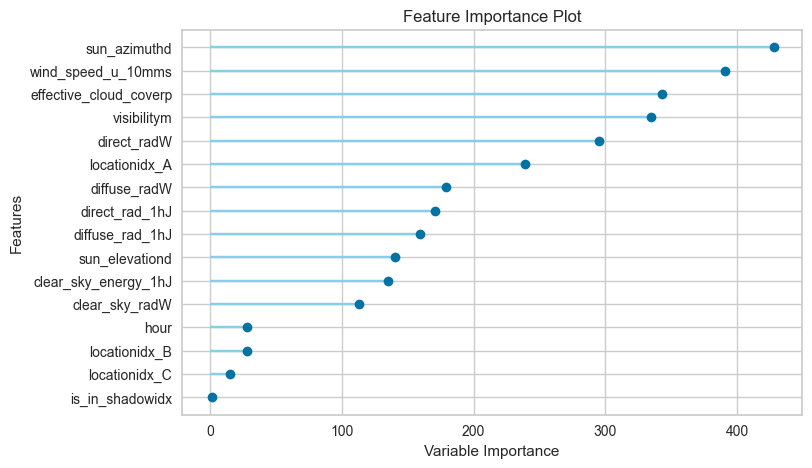

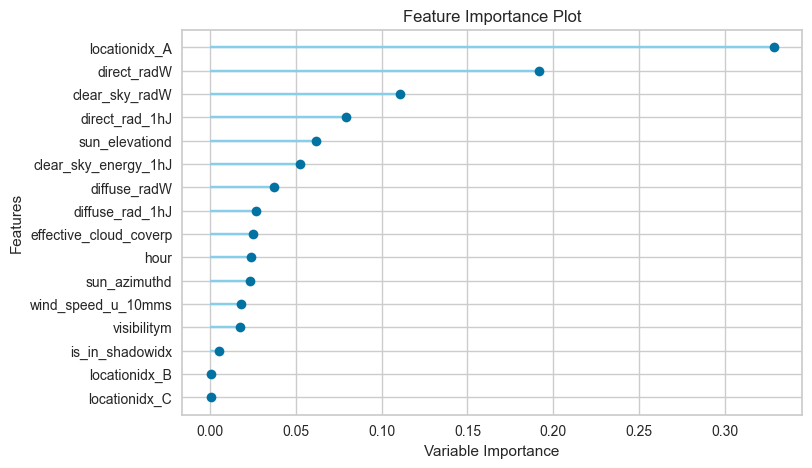

In [141]:
plot_model(lightgbm, plot="feature_all")
plot_model(gump, plot="feature_all")

In [142]:
test_data = pipin.get_combined_test_data()

In [143]:

def get_unique_filename(base_name, folder = "submissions"):
    end = ""
    if folder == "models":
        end = ".pkl"
    
    file_path = Path(folder) / f"{base_name}.csv{end}"
    count = 1
    while file_path.exists():
        file_path = Path(folder) / f"{base_name}_{count}.csv{end}"
        count += 1
    return str(file_path)

In [144]:
# res_goose = predict_model(lightgbm, test_data)
res_stack = predict_model(final_gbm, test_data)
res_stack = res_stack[["prediction_label"]].rename(columns={"prediction_label": "prediction"}).rename_axis(index="id")
# res_stack.to_csv(get_unique_filename('gbm_all_data'))
# save_model(stacker, model_name=get_unique_filename('stack_gbm_et_rf', "models"))


In [145]:
print("done", res_stack.shape)
pipin.compare_mae(res_stack)


done (2160, 1)


79.5203383196451